In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

## creando los filtros de la imagen

from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage.transform import rescale
from scipy.signal import convolve2d

## filtros de kernel
from PIL import Image, ImageFilter
from scipy import signal

# Keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.utils import np_utils
from keras.layers.core import Dropout, Activation
from keras.layers import   BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

c:\Users\jose2\anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
## abriendo el dataset de digits (NMIST)

digits = datasets.load_digits()

In [3]:
## dataset
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
## target de la clasificación
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [5]:
## structura de la imagen
digits.images.shape

(1797, 8, 8)

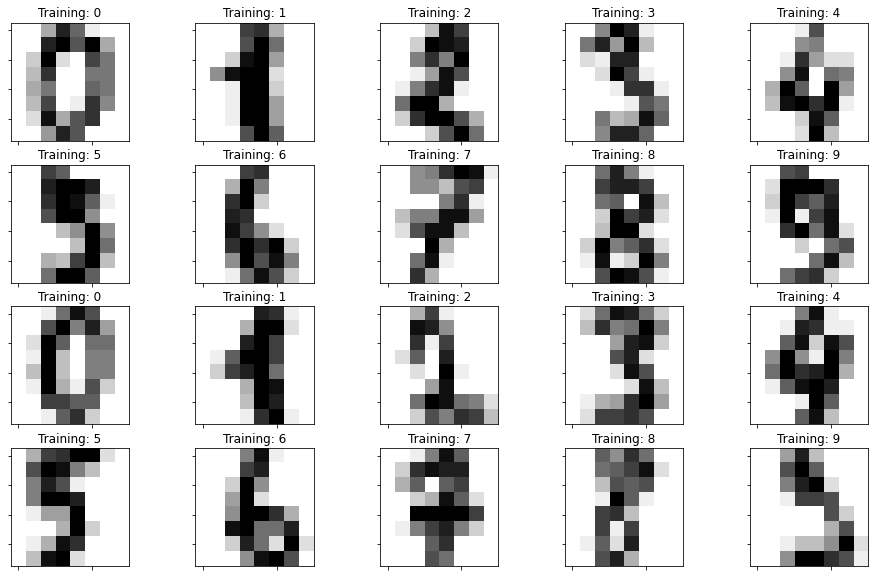

In [6]:
## visualizando el dataset
fig, axes = plt.subplots(4,5, figsize =  (16,10))
axes = axes.flat
for i in range(20):
    axes[i].imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation="nearest")
    axes[i].set_title("Training: %i" % digits.target[i])
    axes[i].set_xticklabels("")
    axes[i].set_yticklabels("")

In [7]:
## Creando el modelo de machine learning
n_samples = digits.images.shape[0]
data = digits.images.reshape((n_samples,-1))
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [8]:
## diviendo el dataset en datos de entranamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.3, shuffle=False)


In [9]:
## creando el modelo de machine learning

model = svm.SVC(gamma= 0.001 )
model.fit(X_train,y_train)
predict = model.predict(X_test)

In [10]:
predict.shape

(540,)

In [11]:
X_test[0].reshape(8,8)

array([[ 0.,  0.,  0.,  8., 14.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 16., 10.,  0.,  0.,  0.],
       [ 0.,  0., 12., 16.,  1.,  3.,  5.,  0.],
       [ 0.,  5., 16.,  6.,  2., 16.,  9.,  0.],
       [ 0., 11., 16.,  0.,  8., 16.,  7.,  0.],
       [ 0., 10., 16., 16., 16., 11.,  1.,  0.],
       [ 0.,  1.,  7.,  9., 16.,  4.,  0.,  0.],
       [ 0.,  0.,  0., 10., 11.,  0.,  0.,  0.]])

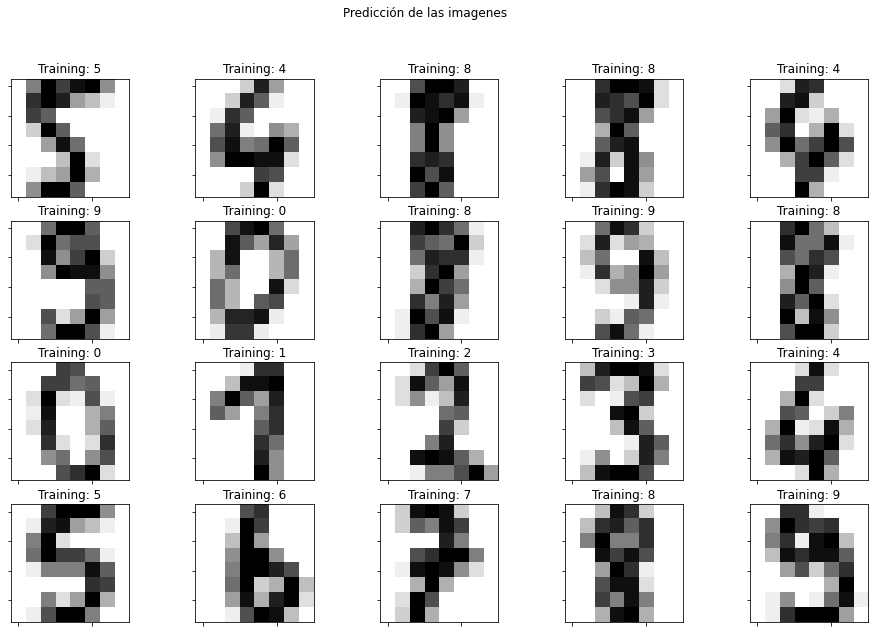

In [12]:
## visualizando de la predicción
fig, axes = plt.subplots(4,5, figsize =  (16,10))
axes = axes.flat
for i in range(20):
    axes[i].imshow(X_test[i+20].reshape(8,8), cmap=plt.cm.gray_r, interpolation="nearest")
    axes[i].set_title("Training: %i" % predict[i+20], color = "black" if predict[i+20] == y_test[i+20] else "red")
    axes[i].set_xticklabels("")
    axes[i].set_yticklabels("")
fig.suptitle("Predicción de las imagenes")
plt.show()

In [13]:
print(
    f"Classification report for classifier {model}:\n"
    f"{metrics.classification_report(y_test, predict)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.96      1.00      0.98        53
           2       1.00      0.98      0.99        53
           3       0.96      0.89      0.92        53
           4       0.98      0.95      0.96        57
           5       0.95      0.98      0.96        56
           6       0.98      0.98      0.98        54
           7       1.00      1.00      1.00        54
           8       0.91      0.98      0.94        52
           9       0.96      0.96      0.96        55

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540




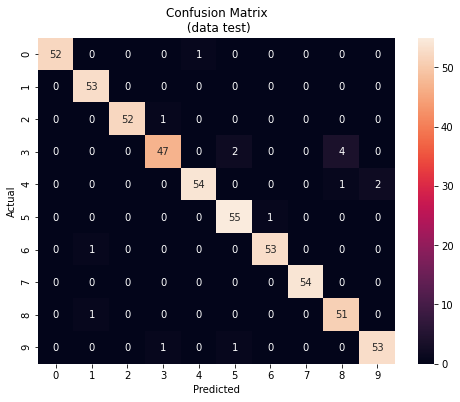

In [14]:
confusion_matrix = pd.crosstab(y_test,predict, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix, annot=True,fmt='g')
plt.title("Confusion Matrix\n (data test)")
plt.show()

### Mejorando el acurracy

In [17]:
X_train[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [15]:
## creando los filtros de kernel para el modelo
def rgb_convolve2d(image, kernel):
    image = image.reshape(8,8)
    image = convolve2d(image, kernel, 'same', boundary = 'fill',
                           fillvalue = 0)
    return image

In [18]:
## tipos de filtros
# Edge Detection1
kernel1 = np.array([[0, -1, 0],
                    [-1, 4, -1],
                    [0, -1, 0]])
# Edge Detection2
kernel2 = np.array([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]])
# Bottom Sobel Filter
kernel3 = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])
# Top Sobel Filter
kernel4 = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])
# Left Sobel Filter
kernel5 = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]])
# Right Sobel Filter
kernel6 = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
# Sharpen
kernel7 = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
# Emboss
kernel8 =  np.array([[-2, -1, 0],
                     [-1,  1, 1],
                     [ 0,  1, 2]])
# Box Blur
kernel9 = (1 / 9.0) * np.array([[1, 1, 1],
                                [1, 1, 1],
                                [1, 1, 1]])
# Gaussian Blur 3x3
kernel10 = (1 / 16.0) * np.array([[1, 2, 1],
                                  [2, 4, 2],
                                  [1, 2, 1]])
# Edge Enhanse
kernel11 = np.array([[0, 0, 0],
                        [-1, 1, 0],
                        [0, 0, 0]])
# Repujado
kernel12 = np.array([[-2, -1, 0],
                        [-1, 1, 1],
                        [0, 1, 2]])
# outline
kernel13 = np.array([[-1, -1, -1],
                        [-1, 8, -1],
                        [-1, -1, -1]])
# identity
kernel14 = np.array([[0, 0, 0],
                        [0, -1, 0],
                        [0, 0, 0]])

In [21]:
imagen = rgb_convolve2d(X_train[14],kernel12)
imagen = rgb_convolve2d(imagen,kernel3)


Text(0.5, 1.0, 'filtro kernel')

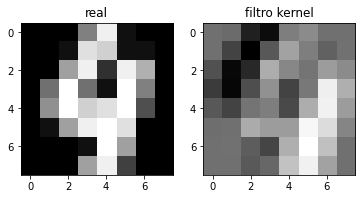

In [20]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize = (6,4))

axes[0].imshow(X_train[14].reshape(8,8), 
                  cmap='gray')
axes[0].set_title("real")
axes[1].imshow(imagen, 
                  cmap='gray')
axes[1].set_title("filtro kernel")

In [23]:
kernel = [kernel1,kernel2 ,kernel3 ,kernel4 ,kernel5, 
kernel6 ,kernel7 ,kernel8 ,kernel9 ,kernel10 ,kernel11,kernel12, kernel13,kernel14]

Text(0.5, 0.98, 'Tipos de kernel')

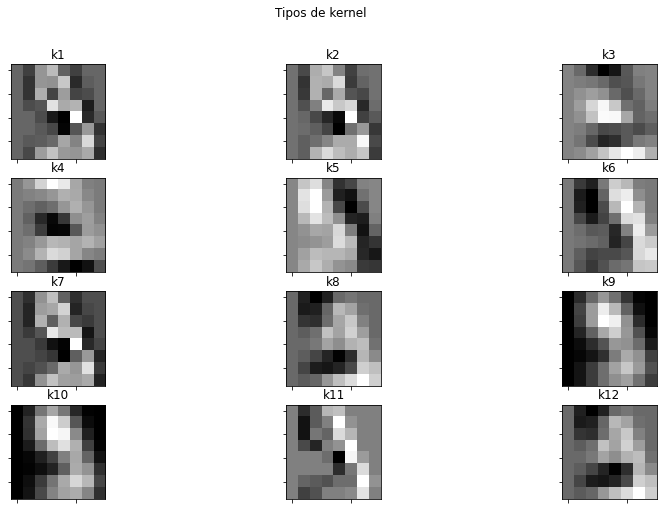

In [24]:
fig, axes = plt.subplots(nrows=4,ncols=3,figsize = (14,8))
axes = axes.flat
for i in range(12):
    axes[i].imshow(rgb_convolve2d(X_train[29],kernel[i]), 
                    cmap='gray')
    axes[i].set_title(f"k{i+1}")
    axes[i].set_xticklabels("")
    axes[i].set_yticklabels("")
fig.suptitle("Tipos de kernel")

In [25]:
## creando los filtros de kernel para el modelo general

def rgb_kernel_convolve2d(image, kernel):
    image_k = []
    for i in range(image.shape[0]):
        image_transform = image[i].reshape(8,8)
        image_k.append(convolve2d(image_transform, kernel, 'same', boundary = 'fill',
                            fillvalue = 0))
    image_k = np.array(image_k)
    n_samples = image.shape[0]
    image_k= image_k.reshape((n_samples,-1))
    return image_k

In [27]:
## aplicando los filtros de kernel
X_train2 = rgb_kernel_convolve2d(X_train, kernel14)
X_train2 = rgb_kernel_convolve2d(X_train2, kernel10)

X_test2 = rgb_kernel_convolve2d(X_test, kernel14)
X_test2 = rgb_kernel_convolve2d(X_test2, kernel10)


In [28]:
## creando el modelo de machine learning

model = svm.SVC(gamma= 'scale',class_weight="balanced", C = 100 )
model.fit(X_train2,y_train)
predict = model.predict(X_test2)

In [29]:
print(
    f"Classification report for classifier {model}:\n"
    f"{metrics.classification_report(y_test, predict)}\n"
)

Classification report for classifier SVC(C=100, class_weight='balanced'):
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        53
           1       0.96      0.98      0.97        53
           2       0.96      0.98      0.97        53
           3       0.94      0.87      0.90        53
           4       0.96      0.93      0.95        57
           5       0.92      1.00      0.96        56
           6       0.95      0.98      0.96        54
           7       0.98      1.00      0.99        54
           8       0.87      0.90      0.89        52
           9       0.96      0.89      0.92        55

    accuracy                           0.95       540
   macro avg       0.95      0.95      0.95       540
weighted avg       0.95      0.95      0.95       540




## APLICANDO KERAS ( Redes Neuronales CONVOLUCIONALES)

In [30]:
n_class = pd.unique(y_train).shape[0]
Y_train = np_utils.to_categorical(y_train, n_class)
Y_test = np_utils.to_categorical(y_test, n_class)


In [31]:
Y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [32]:
y_train.shape,Y_train.shape

((1257,), (1257, 10))

In [53]:
## inicualizando el modelo
model = Sequential()

## creando la primera capa 

model.add(Dense(units= 25,input_shape = (64,)))
# Función de activación
model.add(Activation('relu'))
# realizando un dropout
model.add(Dropout(0.2))

## Creando segunda capa

model.add(Dense(units= 25))
# Función de activación
model.add(Activation('relu'))
# realizando un dropout
model.add(Dropout(0.2))

## Creando Tercera capa

model.add(Dense(units= 25))
# Función de activación
model.add(Activation('relu'))
# realizando un dropout
model.add(Dropout(0.2))


# Creando la capa de salida

model.add(Dense(units= 10,input_shape = (64,)))
model.add(Activation('softmax'))

In [54]:
model.compile(optimizer= 'adam', 
loss = "categorical_crossentropy", metrics= ["accuracy"])

In [35]:
X_train.shape

(1257, 64)

In [55]:
result= model.fit(X_train, Y_train,
        # muestras para la actualización de los pesos
          batch_size=10, 
        # n° de veces que se va a iterar en el conjunto de entrenamiento
          epochs=45,
          verbose=2,
          validation_data=(X_test, Y_test))

Epoch 1/45
126/126 - 3s - loss: 3.2734 - accuracy: 0.1551 - val_loss: 2.0480 - val_accuracy: 0.2870 - 3s/epoch - 23ms/step
Epoch 2/45
126/126 - 1s - loss: 2.0945 - accuracy: 0.2633 - val_loss: 1.7746 - val_accuracy: 0.4556 - 689ms/epoch - 5ms/step
Epoch 3/45
126/126 - 1s - loss: 1.8731 - accuracy: 0.3532 - val_loss: 1.5320 - val_accuracy: 0.5815 - 584ms/epoch - 5ms/step
Epoch 4/45
126/126 - 1s - loss: 1.5856 - accuracy: 0.4439 - val_loss: 1.2267 - val_accuracy: 0.6741 - 514ms/epoch - 4ms/step
Epoch 5/45
126/126 - 1s - loss: 1.3618 - accuracy: 0.5529 - val_loss: 1.0005 - val_accuracy: 0.7481 - 524ms/epoch - 4ms/step
Epoch 6/45
126/126 - 1s - loss: 1.1142 - accuracy: 0.6205 - val_loss: 0.7547 - val_accuracy: 0.8296 - 595ms/epoch - 5ms/step
Epoch 7/45
126/126 - 1s - loss: 1.0532 - accuracy: 0.6293 - val_loss: 0.6394 - val_accuracy: 0.8481 - 636ms/epoch - 5ms/step
Epoch 8/45
126/126 - 1s - loss: 0.9441 - accuracy: 0.6738 - val_loss: 0.5475 - val_accuracy: 0.8759 - 533ms/epoch - 4ms/step
Ep

In [45]:
score = result.model.evaluate(X_test, Y_test, verbose = 2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

17/17 - 1s - loss: 0.4147 - accuracy: 0.8926 - 1s/epoch - 68ms/step
Test loss: 0.41470152139663696
Test accuracy: 0.8925926089286804


In [113]:
X_test.shape

(899, 64)

### Red neuronal convolucional

In [65]:
# Again, do some formatting
# Except we do not flatten each image into a 784-length vector because we want to perform convolutions first

X_train3 = X_train.reshape(1257, 8, 8, 1) 
X_test3 = X_test.reshape(540, 8, 8, 1)

X_train3 = X_train3.astype('float32')         
X_test3 = X_test3.astype('float32')

X_train3 /= 255                              # normalize each value for each pixel for the entire vector for each input
X_test3 /= 255

print("Training matrix shape", X_train3.shape)
print("Testing matrix shape", X_test3.shape)

Training matrix shape (1257, 8, 8, 1)
Testing matrix shape (540, 8, 8, 1)


In [66]:
model = Sequential()                                 # Linear stacking of layers

# Convolution Layer 1
model.add(Conv2D(32, (3, 3), input_shape=(8,8,1))) # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer01 = Activation('relu')                     # activation
model.add(convLayer01)


# Convolution Layer 2
model.add(Conv2D(64, (3, 3)))                        # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer04 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer04)
model.add(Flatten())                               # Flatten final 4x4x64 output matrix into a 1024-length vector

# Fully Connected Layer 3
model.add(Dropout(0.2))  
model.add(Dense(50))                                # 50 FCN nodes
model.add(BatchNormalization())                      # normalization
model.add(Activation('relu'))   

# Fully Connected Layer 5                      
model.add(Dropout(0.2))                              # 20% dropout of randomly selected nodes
model.add(Dense(10))                                 # final 10 FCN nodes
model.add(Activation('softmax'))  

In [67]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 6, 6, 32)          320       
                                                                 
 batch_normalization_4 (Batc  (None, 6, 6, 32)         128       
 hNormalization)                                                 
                                                                 
 activation_32 (Activation)  (None, 6, 6, 32)          0         
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 64)          18496     
                                                                 
 batch_normalization_5 (Batc  (None, 4, 4, 64)         256       
 hNormalization)                                                 
                                                                 
 activation_33 (Activation)  (None, 4, 4, 64)         

In [68]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [69]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [70]:
train_generator = gen.flow(X_train3, Y_train, batch_size=32)
test_generator = test_gen.flow(X_test3, Y_test, batch_size=32)

In [72]:

model.fit_generator(train_generator, steps_per_epoch=1257//32, epochs=100, verbose=1, 
                    validation_data= test_generator, validation_steps=540//32)

<ipython-input-72-54665b3947a7>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, steps_per_epoch=1257//32, epochs=100, verbose=1,


Epoch 1/100
39/39 [==============================] - 2s 61ms/step - loss: 1.4094 - accuracy: 0.5984 - val_loss: 2.3367 - val_accuracy: 0.0918
Epoch 2/100
39/39 [==============================] - 1s 36ms/step - loss: 1.0448 - accuracy: 0.7543 - val_loss: 2.3661 - val_accuracy: 0.0957
Epoch 3/100
39/39 [==============================] - 2s 42ms/step - loss: 0.8404 - accuracy: 0.8261 - val_loss: 2.4015 - val_accuracy: 0.0957
Epoch 4/100
39/39 [==============================] - 1s 35ms/step - loss: 0.7050 - accuracy: 0.8588 - val_loss: 2.4101 - val_accuracy: 0.0977
Epoch 5/100
39/39 [==============================] - 2s 46ms/step - loss: 0.6235 - accuracy: 0.8588 - val_loss: 2.4280 - val_accuracy: 0.1016
Epoch 6/100
39/39 [==============================] - 1s 37ms/step - loss: 0.5230 - accuracy: 0.8931 - val_loss: 2.4065 - val_accuracy: 0.0977
Epoch 7/100
39/39 [==============================] - 2s 38ms/step - loss: 0.4474 - accuracy: 0.9102 - val_loss: 2.3917 - val_accuracy: 0.1270
Epoch 

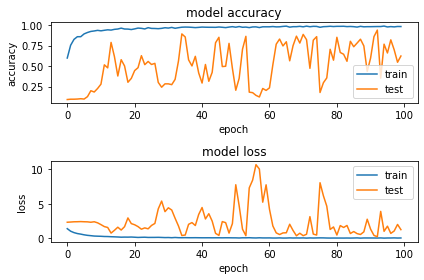

In [74]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [ ]:
model.history.history

{'loss': [1.874001145362854,
  1.213083028793335,
  0.9467852711677551,
  0.7735491394996643,
  0.6798977851867676,
  0.5661628246307373,
  0.5276862382888794,
  0.4640578627586365,
  0.39051568508148193,
  0.3875615894794464,
  0.3751507103443146,
  0.2855387330055237,
  0.26388823986053467,
  0.29747992753982544,
  0.2374298870563507,
  0.21192479133605957,
  0.2478567510843277,
  0.22702014446258545,
  0.22254063189029694,
  0.22138464450836182,
  0.21894951164722443,
  0.16254307329654694,
  0.16091153025627136,
  0.16978661715984344,
  0.18497447669506073,
  0.1884031593799591,
  0.15080532431602478,
  0.16174469888210297,
  0.1622086465358734,
  0.16024412214756012,
  0.12616579234600067,
  0.12559401988983154,
  0.17369113862514496,
  0.11325398087501526,
  0.1227632462978363],
 'accuracy': [0.3758542239665985,
  0.6537585258483887,
  0.7289294004440308,
  0.785876989364624,
  0.8041002154350281,
  0.8610478639602661,
  0.8576309680938721,
  0.8758541941642761,
  0.8952164053916

In [ ]:
score = model.evaluate(X_test3, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

29/29 [==============================] - 2s 15ms/step - loss: 12.8429 - accuracy: 0.1012
Test score: 12.84286117553711
Test accuracy: 0.10122358053922653


In [ ]:
X_test3.shape

(899, 8, 8, 1)

### Mejorar los hyperparametros

In [75]:
## diviendo el dataset en datos de entranamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.3, shuffle=False)

In [77]:
classifier = model = svm.SVC()

In [78]:
parameters =[
    { "C" : [1,10,100,1000], "kernel" : ["linear"]},
    { "C" : [1,10,100,1000], "kernel" : ["rbf"], "gamma" : [0.5,0.1,0.001, 0.001] }
            ]

In [79]:
grid_search = GridSearchCV(estimator= classifier, param_grid= parameters, scoring= "accuracy",
                          cv = 10, n_jobs= 1)

In [80]:
grid_search = grid_search.fit(X_train, y_train)

In [81]:
grid_search.best_estimator_

SVC(C=10, gamma=0.001)

In [82]:
means = grid_search.cv_results_["mean_test_score"]
stds = grid_search.cv_results_["std_test_score"]
params = grid_search.cv_results_["params"]
for m,s,p in zip(means, stds, params) :
    print("%0.3f (+/- %0.3f) para %r"%(m,2*s,p))

0.964 (+/- 0.049) para {'C': 1, 'kernel': 'linear'}
0.964 (+/- 0.049) para {'C': 10, 'kernel': 'linear'}
0.964 (+/- 0.049) para {'C': 100, 'kernel': 'linear'}
0.964 (+/- 0.049) para {'C': 1000, 'kernel': 'linear'}
0.103 (+/- 0.001) para {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.103 (+/- 0.001) para {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.974 (+/- 0.041) para {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.974 (+/- 0.041) para {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.103 (+/- 0.001) para {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.103 (+/- 0.001) para {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.980 (+/- 0.040) para {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.980 (+/- 0.040) para {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.103 (+/- 0.001) para {'C': 100, 'gamma': 0.5, 'kernel': 'rbf'}
0.103 (+/- 0.001) para {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
0.980 (+/- 0.040) para {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.980 (+/- 0.040) para {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.103 

In [83]:
y_pred = grid_search.predict(X_test)

In [84]:
print(
    f"Classification report for classifier {model}:\n"
    f"{metrics.classification_report(y_test, y_pred)}\n"
)

Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.96      1.00      0.98        53
           2       1.00      0.98      0.99        53
           3       0.96      0.91      0.93        53
           4       0.98      0.95      0.96        57
           5       0.95      0.98      0.96        56
           6       0.98      0.98      0.98        54
           7       1.00      1.00      1.00        54
           8       0.94      0.98      0.96        52
           9       0.95      0.96      0.95        55

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540


